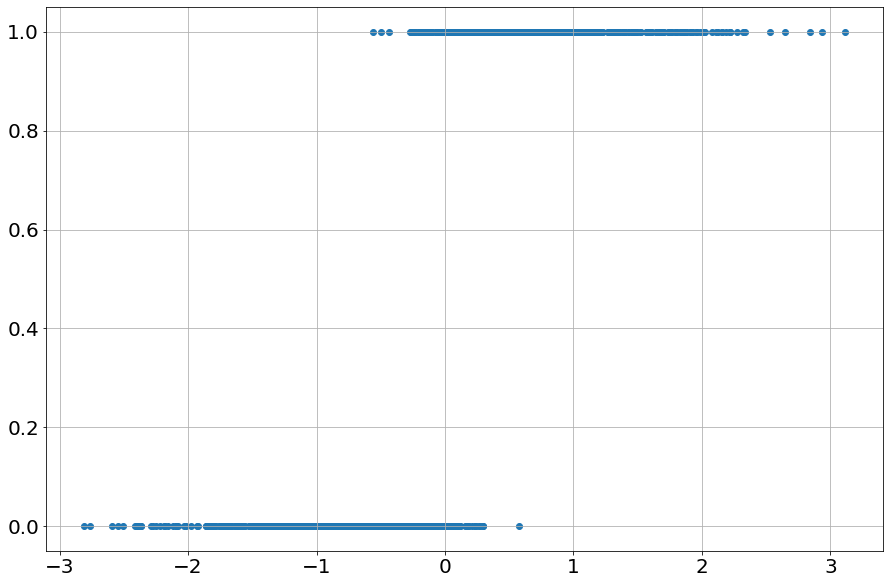

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from termcolor import colored

n_train = 1000

train_x = np.random.normal(0, 1, size=(n_train, 1)).astype('float32')
train_x_noise = train_x + 0.2 * np.random.normal(0, 1, size=(n_train, 1))

train_y = (train_x_noise > 0).astype(np.int32)

fig, ax = plt.subplots(figsize=(15,10))
ax.scatter(train_x, train_y)
ax.tick_params(labelsize=20)
ax.grid()

In [4]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.metrics import SparseCategoricalAccuracy, Mean
from tensorflow.keras.optimizers import SGD

train_ds = tf.data.Dataset.from_tensor_slices((train_x, train_y))
train_ds = train_ds.shuffle(n_train).batch(8)



In [13]:
model = Sequential()
model.add(Dense(units=2, activation='softmax'))

loss_object = SparseCategoricalCrossentropy()
optimizer = SGD(learning_rate=1)

train_loss = Mean()
train_acc = SparseCategoricalAccuracy()

EPOCHS = 10

for epoch in range(EPOCHS):
    for x, y in train_ds:
        with tf.GradientTape() as tape:
            predictions = model(x)
            loss = loss_object(y, predictions)
            
        gradients = tape.gradient(loss, model.trainable_variables)
        optimizer.apply_gradients(zip(gradients, model.trainable_variables))
        
        train_loss(loss)
        train_acc(y, predictions)
        
    print(colored('Epochs: ', 'red', 'on_white'), epoch + 1)
    template = 'Train Loss : {:.4f}\t Train Accuracy: {:.2f}%\n'
    
    print(template.format(train_loss.result(), train_acc.result()*100))
    
    train_loss.reset_states()
    train_acc.reset_states()

Epochs:  1
Train Loss : 0.2121	 Train Accuracy: 90.70%

Epochs:  2
Train Loss : 0.1823	 Train Accuracy: 91.20%

Epochs:  3
Train Loss : 0.1819	 Train Accuracy: 91.50%

Epochs:  4
Train Loss : 0.1816	 Train Accuracy: 91.50%

Epochs:  5
Train Loss : 0.1816	 Train Accuracy: 91.10%

Epochs:  6
Train Loss : 0.1815	 Train Accuracy: 91.60%

Epochs:  7
Train Loss : 0.1806	 Train Accuracy: 91.80%

Epochs:  8
Train Loss : 0.1803	 Train Accuracy: 91.50%

Epochs:  9
Train Loss : 0.1814	 Train Accuracy: 91.50%

Epochs:  10
Train Loss : 0.1787	 Train Accuracy: 91.40%



In [12]:
train_loss = Mean()

t1 = tf.constant([1, 2, 3, 4, 5, 6])
for t in t1:
    train_loss(t)
    print(train_loss.result())
    
print()
train_loss.reset_states()

t2 = tf.constant([1, 2, 3, 4, 5, 6])
for t in t1:
    train_loss(t)
    print(train_loss.result())

tf.Tensor(1.0, shape=(), dtype=float32)
tf.Tensor(1.5, shape=(), dtype=float32)
tf.Tensor(2.0, shape=(), dtype=float32)
tf.Tensor(2.5, shape=(), dtype=float32)
tf.Tensor(3.0, shape=(), dtype=float32)
tf.Tensor(3.5, shape=(), dtype=float32)

tf.Tensor(1.0, shape=(), dtype=float32)
tf.Tensor(1.5, shape=(), dtype=float32)
tf.Tensor(2.0, shape=(), dtype=float32)
tf.Tensor(2.5, shape=(), dtype=float32)
tf.Tensor(3.0, shape=(), dtype=float32)
tf.Tensor(3.5, shape=(), dtype=float32)


In [18]:
''' ready for dataset'''
n_train, n_validation, n_test = 1000, 1000, 1000

train_x = np.random.normal(0, 1, size=(n_train, 1)).astype('float32')
train_x_noise = train_x + 0.2 * np.random.normal(0, 1, size=(n_train, 1))
train_y = (train_x_noise > 0).astype(np.int32)

validation_x = np.random.normal(0, 1, size=(n_train, 1)).astype('float32')
validation_x_noise = validation_x + 0.2 * np.random.normal(0, 1, size=(n_train, 1))
validation_y = (validation_x_noise > 0).astype(np.int32)

test_x = np.random.normal(0, 1, size=(n_train, 1)).astype('float32')
test_x_noise = test_x + 0.2 * np.random.normal(0, 1, size=(n_train, 1))
test_y = (test_x_noise > 0).astype(np.int32)


''' split dataset'''
train_ds = tf.data.Dataset.from_tensor_slices((train_x, train_y))
train_ds = train_ds.shuffle(n_train).batch(8)

validation_ds = tf.data.Dataset.from_tensor_slices((validation_x, validation_y))
validation_ds = validation_ds.batch(n_validation)

test_ds = tf.data.Dataset.from_tensor_slices((test_x, test_y))
test_ds = test_ds.batch(n_test)


''' parameter ready '''
train_loss = Mean()
train_acc = SparseCategoricalAccuracy()

validation_loss = Mean()
validation_acc = SparseCategoricalAccuracy()

test_loss = Mean()
test_acc = SparseCategoricalAccuracy()


''' modeling '''
model = Sequential()
model.add(Dense(units=2, activation='softmax'))

loss_object = SparseCategoricalCrossentropy()
optimizer = SGD(learning_rate=1)



EPOCHS = 10

''' start epochs '''
for epoch in range(EPOCHS):
    ''' train set '''
    for x, y in train_ds:
        with tf.GradientTape() as tape:
            ''' fore propagation '''
            predictions = model(x)
            loss = loss_object(y, predictions)
        
        ''' back propagation '''
        gradients = tape.gradient(loss, model.trainable_variables)
        ''' update a parameter '''
        optimizer.apply_gradients(zip(gradients, model.trainable_variables))
        
        train_loss(loss)
        train_acc(y, predictions)
    
    ''' validation set '''
    for x, y in validation_ds:
        predictions = model(x)
        loss = loss_object(y, predictions)
        
        validation_loss(loss)
        validation_acc(y, predictions)
        
    print(colored('Epochs: ', 'red', 'on_white'), epoch + 1)
    template = 'Train Loss : {:.4f}\t Train Accuracy: {:.2f}%\n' + \
                'Validation Loss : {:.4f}\t Validation Accuracy: {:.2f}%\n'
    
    print(template.format(train_loss.result(), train_acc.result()*100, 
                          validation_loss.result(), validation_acc.result()*100))
    
    train_loss.reset_states()
    train_acc.reset_states()
    validation_loss.reset_states()
    validation_acc.reset_states()

''' test set '''
for x, y in test_ds:
    predictions = model(x)
    loss = loss_object(y, predictions)

    test_loss(loss)
    test_acc(y, predictions)

print(colored('Epochs: ', 'red', 'on_white'), epoch + 1)
template = 'test Loss : {:.4f}\t test Accuracy: {:.2f}%\n'

print(template.format(test_loss.result(), test_acc.result()*100))

Epochs:  1
Train Loss : 0.1997	 Train Accuracy: 91.50%
Validation Loss : 0.1428	 Validation Accuracy: 94.60%

Epochs:  2
Train Loss : 0.1624	 Train Accuracy: 93.10%
Validation Loss : 0.1334	 Validation Accuracy: 95.10%

Epochs:  3
Train Loss : 0.1605	 Train Accuracy: 92.20%
Validation Loss : 0.1333	 Validation Accuracy: 94.90%

Epochs:  4
Train Loss : 0.1582	 Train Accuracy: 93.20%
Validation Loss : 0.1404	 Validation Accuracy: 93.80%

Epochs:  5
Train Loss : 0.1590	 Train Accuracy: 92.70%
Validation Loss : 0.1314	 Validation Accuracy: 95.00%

Epochs:  6
Train Loss : 0.1586	 Train Accuracy: 92.90%
Validation Loss : 0.1376	 Validation Accuracy: 94.50%

Epochs:  7
Train Loss : 0.1582	 Train Accuracy: 93.10%
Validation Loss : 0.1313	 Validation Accuracy: 94.70%

Epochs:  8
Train Loss : 0.1579	 Train Accuracy: 92.80%
Validation Loss : 0.1311	 Validation Accuracy: 95.00%

Epochs:  9
Train Loss : 0.1602	 Train Accuracy: 92.50%
Validation Loss : 0.1342	 Validation Accuracy: 94.60%

Epochs:  1